# Final Project 2 

# A. Perkenalan

**Kelompok 5 :**  

1. **Nabila Regitasyari Irmawan : PYTN-KS13-001**
2. **Muhammad Naufal Misbahuddin : PYTN-KS13-006**
3. **Nayla Salsabila Cindiva Utomo Putri : PYTN-KS13-022**


**Latar Belakang**  

Project ini bertujuan untuk membuat model prediksi apakah akan turun hujan atau tidak pada wilayah Australia. Dataset yang digunakan diambil dari kaggle/Rain in Australia (https://www.kaggle.com/jsphyg/weather-dataset-rattle-package)

Dataset WeatherAUS adalah dataset yang berisi data cuaca di beberapa kota di Australia selama beberapa tahun. Dataset tersebut memuat data observasi cuaca harian di wilayah Australia selama 10 tahun. Dataset terdiri dari 145460 observasi dan 23 fitur.

Variabel target dalam dataset ini adalah "RainTomorrow" yang menunjukkan apakah akan terjadi hujan atau tidak pada hari berikutnya. Selain itu, dataset ini juga berisi beberapa variabel input seperti kelembapan, suhu maksimum dan minimum, temperatur di jam 9 pagi


Dataset WeatherAUS penting karena dapat membantu dalam memprediksi cuaca di masa depan dan membantu orang dalam membuat keputusan yang tepat.


# B. Import Pustaka

In [ ]:
#untuk dataframe
import pandas as pd
import numpy as np

#untuk visualisasi data
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import folium
from folium.plugins import FastMarkerCluster

#mengatur display biar maximal
pd.options.display.max_rows = None
pd.options.display.max_columns = None

#modeling
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score # mencari accurasi 
from sklearn.metrics import confusion_matrix # membuat confusion matrix
from sklearn.metrics import classification_report # laporan klasifikasi
from sklearn.metrics import r2_score # evaluasi performa model
from sklearn.metrics import mean_squared_error # menghitung nilai error rata-rata
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# C. Data Loading

In [ ]:
df = pd.read_csv("weatherAUS.csv")
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [ ]:
#Melihat ukuran data(baris, kolom)
df.shape

(145460, 23)

Ada 145.460 baris dan 23 kolom dalam kumpulan data Rain in Australia.


In [ ]:
#Melihat 5 data teratas
pd.set_option('display.max_columns', None)
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [ ]:
#Pengecekan Nama Kolom
df.columns.values

array(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall',
       'Evaporation', 'Sunshine', 'WindGustDir', 'WindGustSpeed',
       'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm',
       'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm',
       'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday',
       'RainTomorrow'], dtype=object)

Melihat ringkasan dataset menggunakan `info()`.

In [ ]:
##Melihat Informasi data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

**Analisis** 

Dapat dilihat pada info di atas, bahwa dataset berisi campuran variabel **kategori** dan **numerik**. Terdapat **7 Variabel kategori** yang memiliki tipe data `objek` dan terdapat **16 Variabel numerik** memiliki tipe data `float64`.
Lalu, pada beberapa kolom ada yang memiliki nilai null.  

In [ ]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


# D. Data Cleaning

Memeriksa missing values semua kolom.

In [ ]:
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

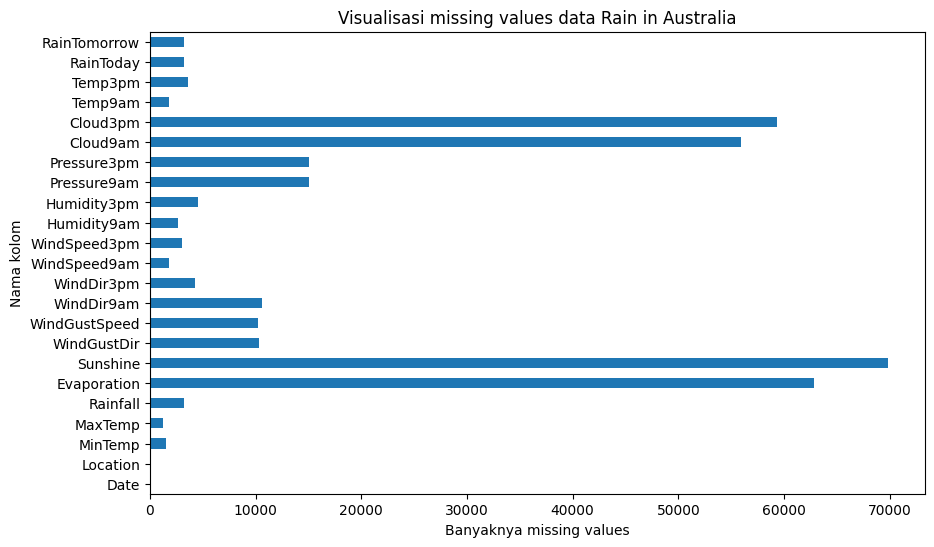

In [ ]:
#Persentasi Missing Value dengan grafik
visualization_null = df.isnull().sum()

visualization_null.plot(kind='barh', figsize=(10, 6))

plt.xlabel('Banyaknya missing values')
plt.ylabel('Nama kolom') 
plt.title('Visualisasi missing values data Rain in Australia')

plt.show()

**Analisis**

Dapat disimpulkan dari grafik di atas. Ada **4 kolom** yang memiliki banyak missing values, yakni `Cloud3pm`, `Cloud9am`, `Sunshine`, dan `Evaporation`.  

In [ ]:
#Menghapus kolom date
df.drop(columns='Date', inplace=True)

In [ ]:
categorical = [var for var in df.columns if df[var].dtype=='O']
print('Kolom kategori :', categorical)

Kolom kategori : ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [ ]:
#Mengubah tipe data object menjadi category 
df[['Location','WindGustDir','WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']] = df[['Location','WindGustDir','WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']].astype('category')

In [ ]:
#Menghapus baris missing values
df_clean = df.dropna(subset=['RainToday', 'RainTomorrow'], axis = 0)

In [ ]:
#mengganti missing values menggunakan nilai mode/modus
df_clean['WindGustDir'].fillna(df_clean['WindGustDir'].mode()[0], inplace=True)
df_clean['WindDir9am'].fillna(df_clean['WindDir9am'].mode()[0], inplace=True)
df_clean['WindDir3pm'].fillna(df_clean['WindDir3pm'].mode()[0], inplace=True)

<ipython-input-14-3932a833c8cd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['WindGustDir'].fillna(df_clean['WindGustDir'].mode()[0], inplace=True)
<ipython-input-14-3932a833c8cd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['WindDir9am'].fillna(df_clean['WindDir9am'].mode()[0], inplace=True)
<ipython-input-14-3932a833c8cd>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['WindDir3pm'].fillna(df_clean

In [ ]:
#Memeriksa kembali untuk memastikan missing values pada kolom kategori sudah tidak ada.
df_clean[categorical].isnull().sum()

Location        0
WindGustDir     0
WindDir9am      0
WindDir3pm      0
RainToday       0
RainTomorrow    0
dtype: int64

In [ ]:
#mencari tau kolom mana saja yang termasuk kolom numerik
numerical = [var for var in df.columns if df[var].dtype == 'float64']
print('Kolom numerik :', numerical)

Kolom numerik : ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


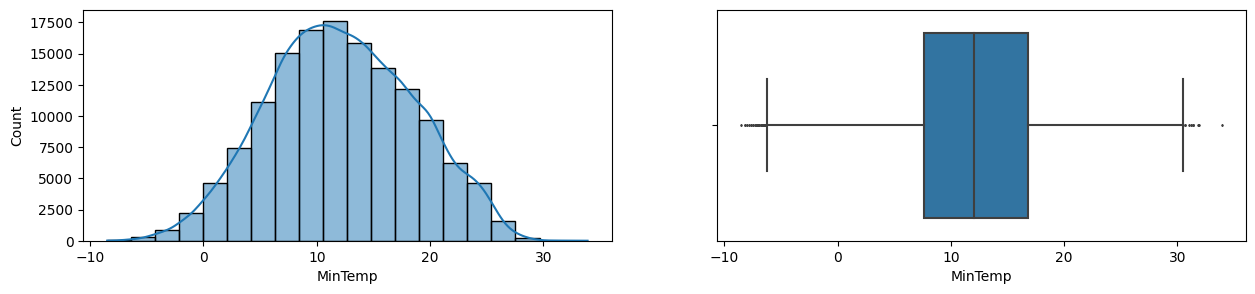

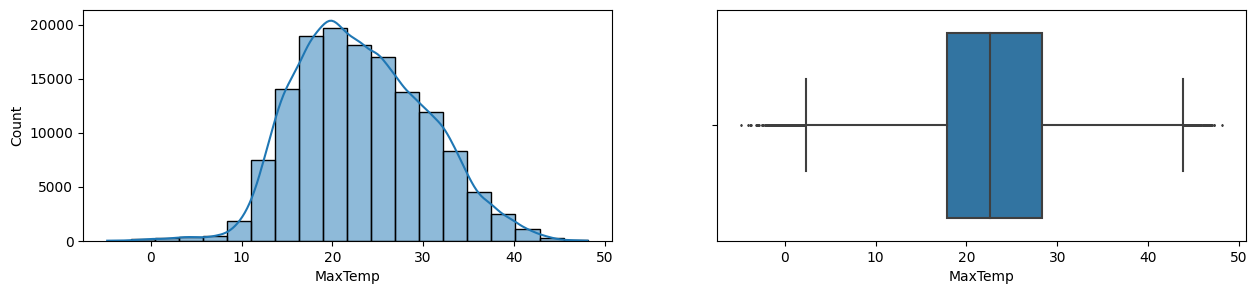

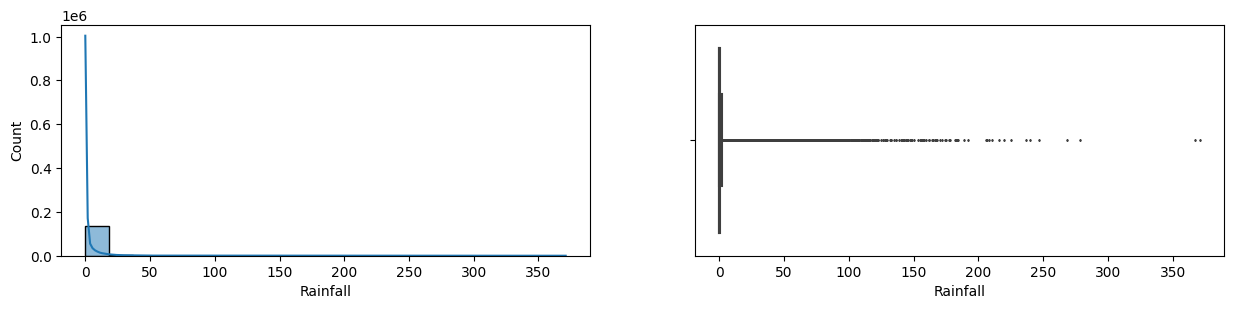

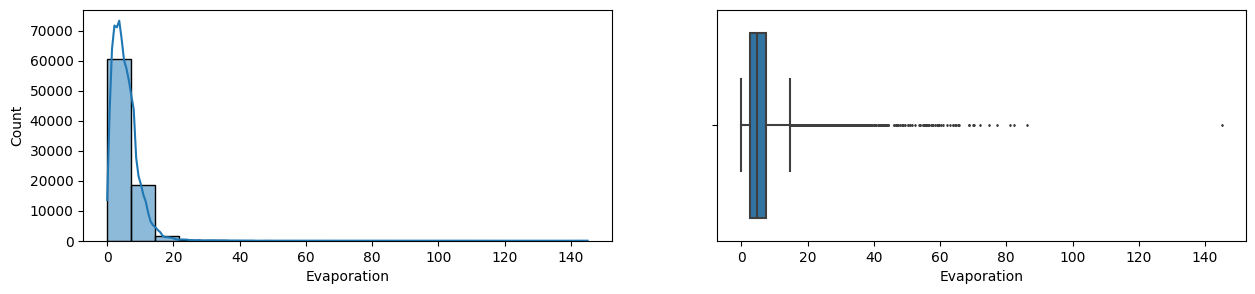

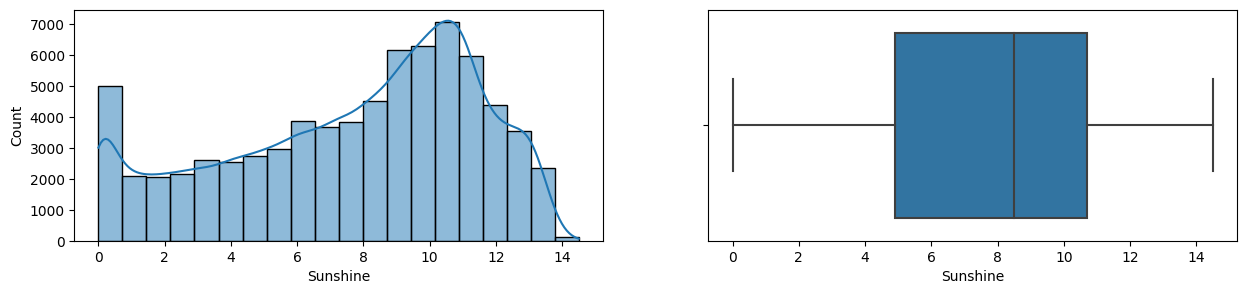

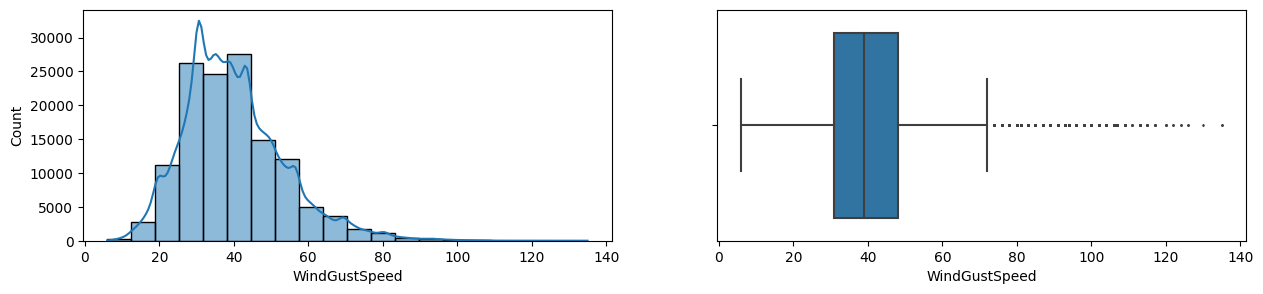

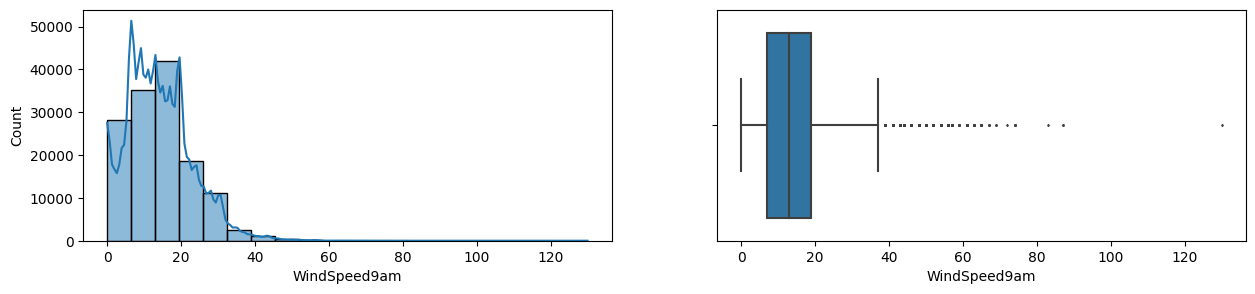

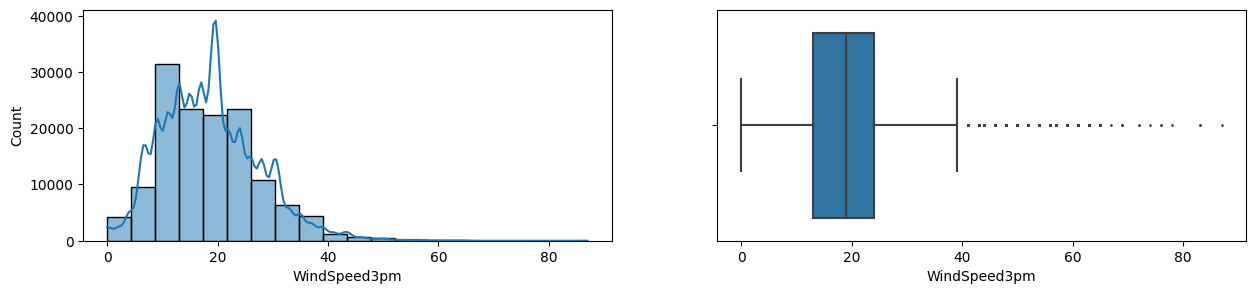

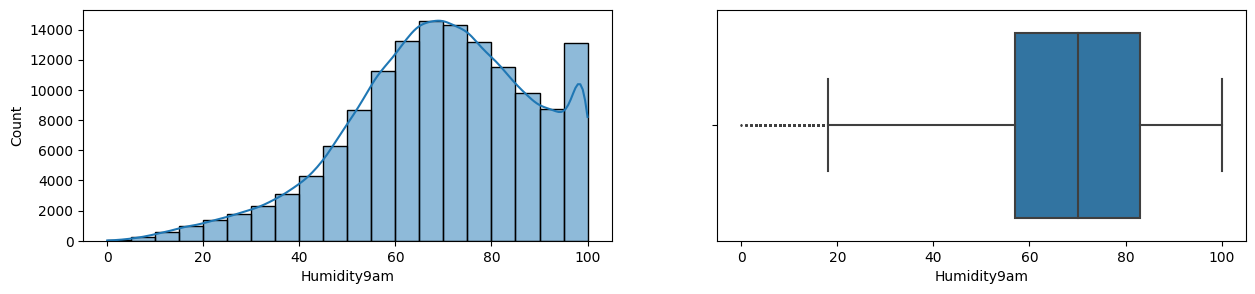

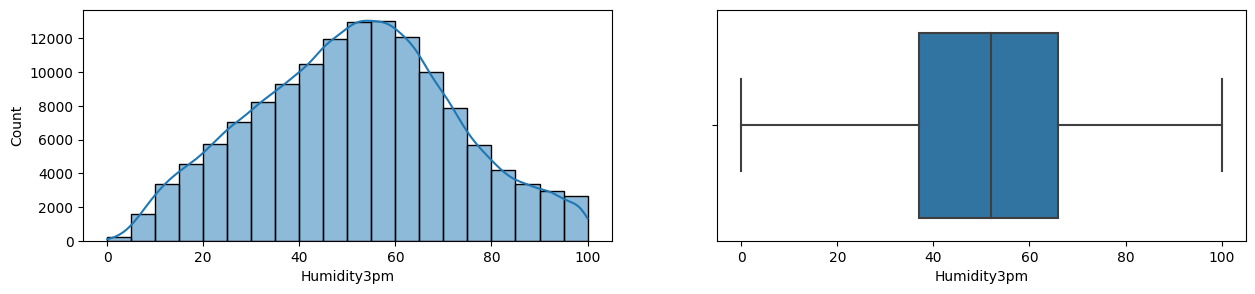

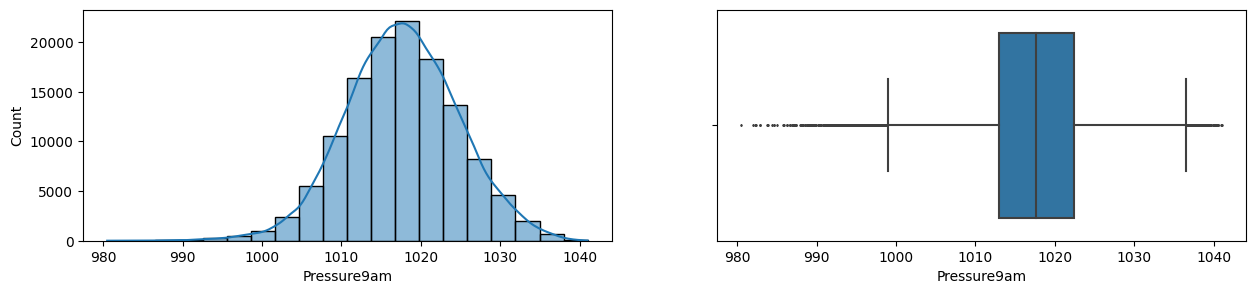

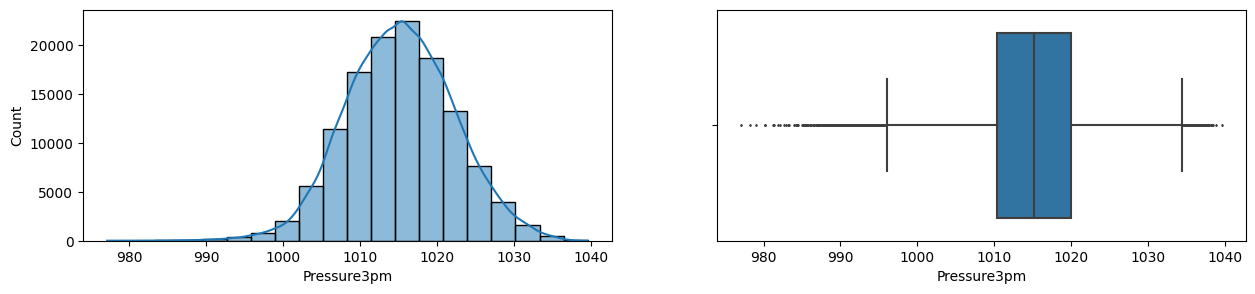

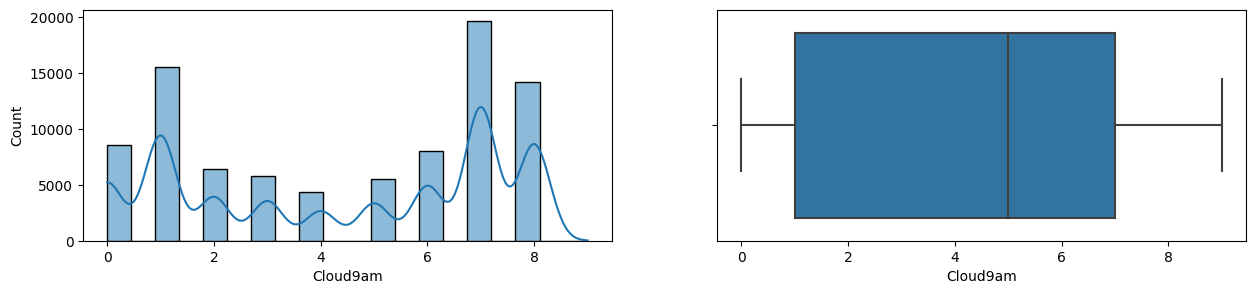

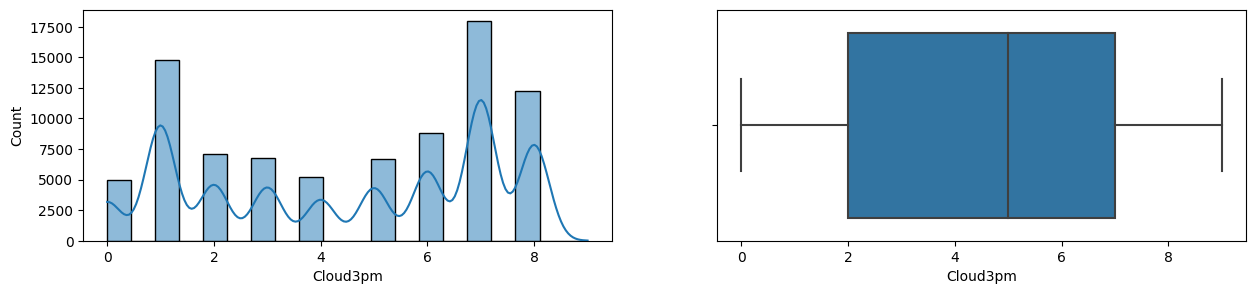

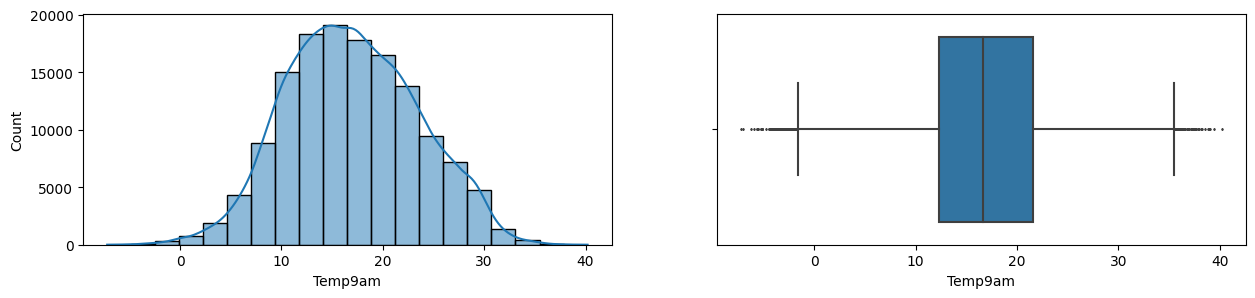

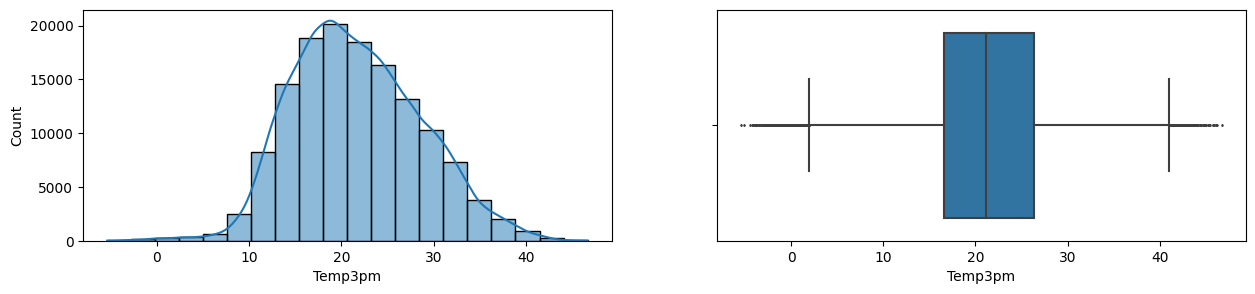

In [ ]:
#melihat visualisasi data box plot atau hist plot untuk menentukan data tersebut diganti dengan mean atau median.
for i in numerical:
    fig, axs = plt.subplots(1,2,figsize=(15, 3))

    sns.histplot(df_clean[i],bins=20, kde=True,ax=axs[0])
    sns.boxplot(data = df_clean[i], x = df_clean[i], ax = axs[1], fliersize=1)

**Analisis**

Berdasarkan visualisasi data di atas, kita perlu menghapus kolom/fitur `Rainfall` karena terlalu banyak outliers.

In [ ]:
df_clean.drop(columns='Rainfall', inplace=True)

<ipython-input-18-7f713c2ea3c7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean.drop(columns='Rainfall', inplace=True)


In [ ]:
# Replace missing values

df_clean['MinTemp'].fillna(df_clean['MinTemp'].median(), inplace=True)
df_clean['MaxTemp'].fillna(df_clean['MaxTemp'].median(), inplace=True)
df_clean['Evaporation'].fillna(df_clean['Evaporation'].median(), inplace=True)
df_clean['Sunshine'].fillna(df_clean['Sunshine'].median(), inplace=True)
df_clean['WindGustSpeed'].fillna(df_clean['WindGustSpeed'].median(), inplace=True)
df_clean['WindSpeed9am'].fillna(df_clean['WindSpeed9am'].median(), inplace=True)
df_clean['WindSpeed3pm'].fillna(df_clean['WindSpeed3pm'].median(), inplace=True)
df_clean['Humidity9am'].fillna(df_clean['Humidity9am'].median(), inplace=True)
df_clean['Humidity3pm'].fillna(df_clean['Humidity3pm'].median(), inplace=True)
df_clean['Pressure9am'].fillna(df_clean['Pressure9am'].median(), inplace=True)
df_clean['Pressure3pm'].fillna(df_clean['Pressure3pm'].median(), inplace=True)
df_clean['Cloud9am'].fillna(df_clean['Cloud9am'].median(), inplace=True)
df_clean['Cloud3pm'].fillna(df_clean['Cloud3pm'].median(), inplace=True)
df_clean['Temp9am'].fillna(df_clean['Temp9am'].median(), inplace=True)
df_clean['Temp3pm'].fillna(df_clean['Temp3pm'].median(), inplace=True)

<ipython-input-18-8e9b813c159a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['MinTemp'].fillna(df_clean['MinTemp'].median(), inplace=True)
<ipython-input-18-8e9b813c159a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['MaxTemp'].fillna(df_clean['MaxTemp'].median(), inplace=True)
<ipython-input-18-8e9b813c159a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Evaporation'].fillna(df_clean['Evaporation']

In [ ]:
#Memeriksa nilai duplikat
df_clean.duplicated().sum()

42

In [ ]:
#Menghapus data duplikat
df_clean.drop_duplicates(keep=False, inplace=True)
print('Jumlah data duplikat', df_clean.duplicated().sum())

Jumlah data duplikat 0


<ipython-input-20-3f94d47417a4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean.drop_duplicates(keep=False, inplace=True)


In [ ]:
#Memeriksa missing values
df_clean.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

# E. Explorasi Data

<Axes: xlabel='MaxTemp', ylabel='MinTemp'>

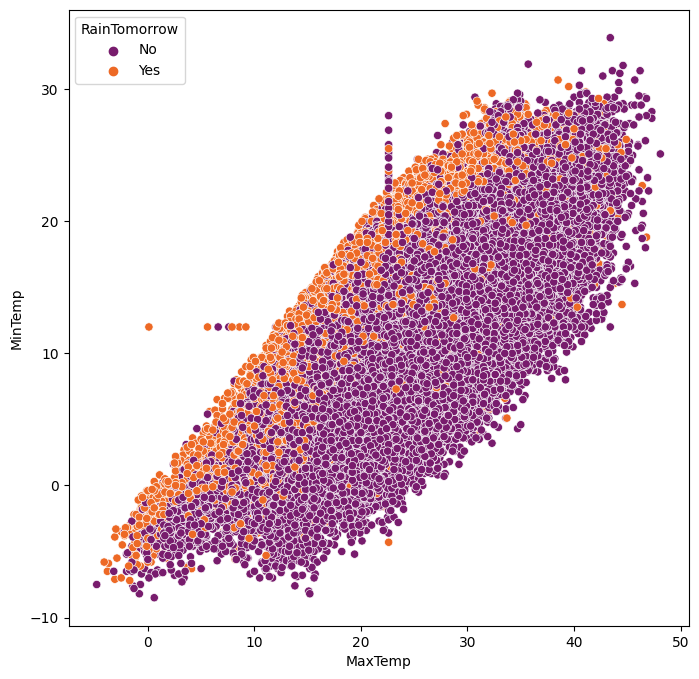

In [ ]:
#Visualisasi kemungkinan/probabilitas hujan besok berdasarka temperatur
plt.figure(figsize = (8,8))
sns.scatterplot(x = 'MaxTemp', y = 'MinTemp', hue = 'RainTomorrow' , palette = 'inferno',data = df_clean)

Analisis

Dari visualisasi diatas dengan menggunakan scatter plot kita bisa melihat bahwa ketika minimum temperatur naik maka maximum temperatur pun ikut naik. itu mengartikan bahwa hubungan keduanya linear. titik orange mewakili kemungkinan hujan dan titik biru mewakili bahwa hujan tidak akan turun. keduanya juga memilki hubungan yang baik antara maximum temperatur dengan minimun temperatur

<Axes: xlabel='Humidity9am', ylabel='Temp9am'>

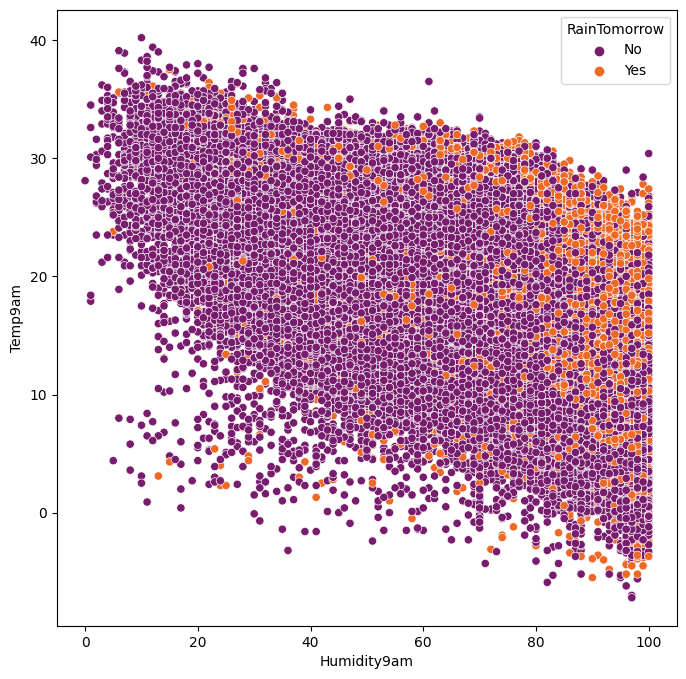

In [ ]:
#Visualisasi kemungkinan/probabilitas hujan besok berdasarkan temp9pm dan juga kelembapan
plt.figure(figsize = (8,8))
sns.scatterplot(x = 'Humidity9am', y = 'Temp9am', hue = 'RainTomorrow', palette ='inferno', data = df_clean)

Analisis 

Dari scatter plot diatas kita bisa melihat bahwa kemungkinan hujan besok yang diwakili dengan titik orange lebih sedikit dibandingkan dengan titik ungu yang mewakili kemungkinan tidak hujan. Selain itu kita juga bisa melihat bahwa hubungan antara temperatur dan kelembapan cukup baik karena ditandai dengan meningkatnya bersamaan kedua variabel tersebut.

# F. Data Prosessing

In [ ]:
#Modelling data yang akan digunakan
df_modelling = df_clean[['RainTomorrow','Humidity9am','Temp9am','MaxTemp','MinTemp']]
#Melihat informasi data yang akan digunakan untuk modelling
df_modelling.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140738 entries, 0 to 145458
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype   
---  ------        --------------   -----   
 0   RainTomorrow  140738 non-null  category
 1   Humidity9am   140738 non-null  float64 
 2   Temp9am       140738 non-null  float64 
 3   MaxTemp       140738 non-null  float64 
 4   MinTemp       140738 non-null  float64 
dtypes: category(1), float64(4)
memory usage: 5.5 MB


In [ ]:
#Melakukan Encodding data
df_modelling = pd.get_dummies(df_modelling)
df_modelling.head()

,Humidity9am,Temp9am,MaxTemp,MinTemp,RainTomorrow_No,RainTomorrow_Yes
0,71.0,16.9,22.9,13.4,1,0
1,44.0,17.2,25.1,7.4,1,0
2,38.0,21.0,25.7,12.9,1,0
3,45.0,18.1,28.0,9.2,1,0
4,82.0,17.8,32.3,17.5,1,0


In [ ]:
#Membuat variable Predictors dan juga variable dan Respon
X = df_modelling[['Humidity9am','Temp9am','MaxTemp','MinTemp']]#predictors
Y = df_modelling['RainTomorrow_Yes']#Respon 

<Axes: >

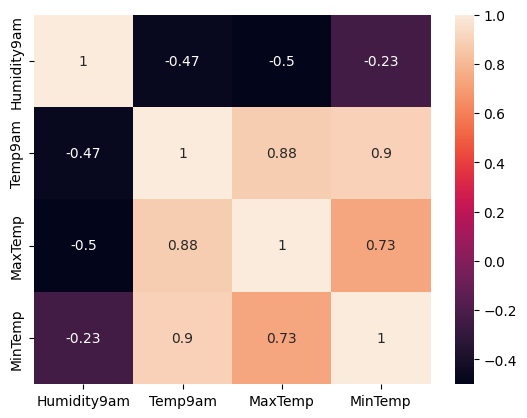

In [ ]:
#Menghitung matriks korelasi
correlation_matrix = X.corr()
#Visualisasi matriks korelasi menggunakan heatmap
sns.heatmap(correlation_matrix, annot=True)


In [ ]:
#Melihat niali korelasi antara predictors dan respon
Korelasi = X.corrwith(Y)
print("Korelasi dengan variable respon : ")
print(Korelasi)

Korelasi dengan variable respon : 
Humidity9am    0.256168
Temp9am       -0.025422
MaxTemp       -0.159241
MinTemp        0.084176
dtype: float64


Analisis 

Berdasarkan hasil dari heatmap maupun korelasi antara Prediktor dengan target di dapat kesimpulan sebagai berikut :
1. Hubungan antara RainTomorrow dengan Humidity9am memmiliki angka yang positif sebesar 0.25 yang mengartikan bahwa semakin tinggi kelembapannya semakin tinggi juga kemungikanan terjadinya hujan
2. Hubungan antara Temp9am dengan RainTomorrow memiliki hubungan yang negativ. Mengartikan bahwa semakin tinggi suhu pada 9 pagi maka kemungkuninan hujan pun semakin rendah
3. Hubungan antara MaxTemp dengan RainTomorrow memiliki hubungan yang negativ. Mengartikan bahwa semakin tinggi suhunya semakin kecil kemungkinan hujan terjadi.
4. Hubungan antara MinTemp dengan RainTomorrow memiliki hubungan yang postiv. mengartikan bahwa jika terjadi penurunan suhu maka kemungkinan terjadinya hujan pun semakin besar.

In [ ]:
# Menyiapkan data latih dan data uji 
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size= 0.3)

# G. Pendefinisian Model

Menggunakan metode yang telah ditetapkan pada Final Project 2 ini yaitu Logistic Regression, KNN, Decission Tree, Random Forest, Naive Bayes, dan Confussion Matrix kami berharap dapat membantu dalam  memprediksi probabilitas hujan pada esok harinya melalui data weatherAUS.csv dengan variable respon yaitu RainTomorrow_YES dengan angka 0 dan juga RainTomorrow_No dengan angka 1.

Kemuadian pada variabel prediktor sebagai pengukurnya kami menggunakan beberapa kolom yaitu kelembapan(Humidity9am), Suhu Maksimum(MaxTemp), Suhu Minimum(MinTemp), kemudian temperatur di jam 9 pagi(temp9am). 



In [ ]:
#logistic regression
model_logit = LogisticRegression()

In [ ]:
#KNN
model_knn = KNeighborsClassifier(n_neighbors=5)

In [ ]:
#SVM
model_svm = SVC()

In [ ]:
#Decission Tree
model_dt = DecisionTreeClassifier()

In [ ]:
#Random Forest
model_rf = RandomForestClassifier()

In [ ]:
#Naive Bayes
model_nb = GaussianNB()

# H. Pelatihan Model 

### Logistic Regression

In [ ]:
#Melatih data model
model_logit.fit(X_train, Y_train)

print('Intercept:', model_logit.intercept_)
print('Coefficients: ', model_logit.coef_)

Intercept: [-2.60458114]
Coefficients:  [[ 0.035069    0.1399999  -0.21722378  0.10363784]]


**Analisis**

Berdasarkan hasil pelatihan model diatas, didapatkan nilai log-odds ketika semua variabel prediktor memiliki nilai 0 sebesar -2.60458114. Selain itu juga didapatkan nilai koefisien setiap variabel prediktor, dengan interpretasi sebagai berikut:

* Setiap kenaikan angka huminitas jam 9 pagi dalam persen (Humidity9am), maka akan meningkatkan probabilitas hujan besok sebesar 0.0345069
* Setiap kenaikan angka temperatur jam 9 pagi dalam celcius (Temp9am), maka akan meningkatkan probabilitas hujan besok sebesar 0.1399999
* Setiap kenaikan angka temperatur tertinggi hari itu dalam celcius (MaxTemp), maka akan menurunkan probabilitas hujan besok sebesar 0.21722378
* Setiap kenaikan angka temperatur terendah hari itu dalam celcius (MinTemp), maka akan meningkatkan probabilitas hujan besok sebesar 0.10363784


In [ ]:
#Melakukan prediksi menggunakan data uji
y_pred_logit = model_logit.predict(X_test)

In [ ]:
#Menghitung RMSE
rmse_logit = mean_squared_error(Y_test, y_pred_logit, squared=False)

In [ ]:
#Menghitung MAE
mae_logit = mean_absolute_error(Y_test, y_pred_logit)

In [ ]:
#Menghitung akurasi model
accuracy_logit = accuracy_score(Y_test, y_pred_logit)

## KNN

In [ ]:
#Melatih data model
model_knn.fit(X_train, Y_train)

KNeighborsClassifier()

In [ ]:
#Melakukan prediksi menggunakan data uji
y_pred_knn = model_knn.predict(X_test)

In [ ]:
#Menghitung RMSE
rmse_knn = mean_squared_error(Y_test, y_pred_knn, squared=False)

In [ ]:
#Menghitung MAE
mae_knn = mean_absolute_error(Y_test, y_pred_knn)

In [ ]:
#Menghitung akurasi model
accuracy_knn = accuracy_score(Y_test, y_pred_knn)

## SVM

In [ ]:
#Melatih data model
model_svm.fit(X_train, Y_train)

SVC()

In [ ]:
#Melakukan prediksi menggunakan data uji
y_pred_svm = model_svm.predict(X_test)

In [ ]:
#Menghitung RMSE
rmse_svm = mean_squared_error(Y_test, y_pred_svm, squared=False)

In [ ]:
#Menghitung MAE
mae_svm = mean_absolute_error(Y_test, y_pred_svm)

In [ ]:
#Menghitung akurasi model
accuracy_svm = accuracy_score(Y_test, y_pred_svm)

## Decision Tree

In [ ]:
#Melatih data model
model_dt.fit(X_train, Y_train)

DecisionTreeClassifier()

In [ ]:
#Melakukan prediksi menggunakan data uji
y_pred_dt = model_dt.predict(X_test)

In [ ]:
#Menghitung RMSE
rmse_dt = mean_squared_error(Y_test, y_pred_dt, squared=False)

In [ ]:
#Menghitung MAE
mae_dt = mean_absolute_error(Y_test, y_pred_dt)

In [ ]:
#Menghitung akurasi model
accuracy_dt = accuracy_score(Y_test, y_pred_dt)

## Random Forest

In [ ]:
#Melatih data model
model_rf.fit(X_train, Y_train)

RandomForestClassifier()

In [ ]:
#Melakukan prediksi menggunakan data uji
y_pred_rf = model_rf.predict(X_test)

In [ ]:
#Menghitung RMSE
rmse_rf = mean_squared_error(Y_test, y_pred_rf, squared=False)

In [ ]:
#Menghitung MAE
mae_rf = mean_absolute_error(Y_test, y_pred_rf)

In [ ]:
#Menghitung akurasi model
accuracy_rf = accuracy_score(Y_test, y_pred_rf)

## Naive Bayes

In [ ]:
#Melatih data model
model_nb.fit(X_train, Y_train)

GaussianNB()

In [ ]:
#Melakukan prediksi menggunakan data uji
y_pred_nb = model_nb.predict(X_test)

In [ ]:
#Menghitung RMSE
rmse_nb = mean_squared_error(Y_test, y_pred_nb, squared=False)

In [ ]:
#Menghitung MAE
mae_nb = mean_absolute_error(Y_test, y_pred_nb)

In [ ]:
#Menghitung akurasi model
accuracy_nb = accuracy_score(Y_test, y_pred_nb)

# I. Evaluasi Model

## Logistic Regression

In [ ]:
#Menampilkan hasil evaluasi
print('Accuracy:', accuracy_logit)
print('RMSE:', rmse_logit)
print('MAE:', mae_logit)
print('Classification Report:')
print(classification_report(Y_test, y_pred_logit))

Accuracy: 0.8052200274738288
RMSE: 0.4413388409444281
MAE: 43.44251811851641
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.97      0.89     32960
           1       0.67      0.22      0.34      9262

    accuracy                           0.81     42222
   macro avg       0.74      0.60      0.61     42222
weighted avg       0.78      0.81      0.77     42222



**Analisis**

Berdasarkan hasil evaluasi model diatas, didapatkan beberapa informasi model sebagai berikut:
* Model memiliki nilai akurasi sebesar  0.8052200274738288, artinya model mampu melakukan prediksi yang benar sekitar 80.52% dari total data.
* RMSE sebesar 0.4413388409444281 menunjukkan tingkat kesalahan rata-rata model.
* MAE sebesar 43.44251811851641 menunjukkan kesalahan rata-rata mutlak model.

## KNN

In [ ]:
#Menampilkan hasil evaluasi
print('Accuracy:', accuracy_knn)
print('RMSE:', rmse_knn)
print('MAE:', mae_knn)
print('Classification Report:')
print(classification_report(Y_test, y_pred_knn))

Accuracy: 0.785585713609019
RMSE: 0.4630489028072316
MAE: 37.741106532139646
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.91      0.87     32960
           1       0.52      0.33      0.40      9262

    accuracy                           0.79     42222
   macro avg       0.67      0.62      0.63     42222
weighted avg       0.76      0.79      0.77     42222



**Analisis**

Berdasarkan hasil evaluasi model diatas, didapatkan beberapa informasi model sebagai berikut:
* Model memiliki nilai akurasi sebesar  0.785585713609019, artinya model mampu melakukan prediksi yang benar sekitar 78.55% dari total data.
* RMSE sebesar 0.4630489028072316 menunjukkan tingkat kesalahan rata-rata model.
* MAE sebesar 37.741106532139646 menunjukkan kesalahan rata-rata mutlak model.

## Decision Tree

In [ ]:
#Menampilkan hasil evaluasi
print('Accuracy:', accuracy_dt)
print('RMSE:', rmse_dt)
print('MAE:', mae_dt)
print('Classification Report:')
print(classification_report(Y_test, y_pred_dt))

Accuracy: 0.7169248259201364
RMSE: 0.5320480937658395
MAE: 33.55056605561082
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.81      0.82     32960
           1       0.37      0.40      0.38      9262

    accuracy                           0.72     42222
   macro avg       0.60      0.60      0.60     42222
weighted avg       0.73      0.72      0.72     42222



**Analisis**

Berdasarkan hasil evaluasi model diatas, didapatkan beberapa informasi model sebagai berikut:
* Model memiliki nilai akurasi sebesar  0.7169248259201364, artinya model mampu melakukan prediksi yang benar sekitar 71.69% dari total data.
* RMSE sebesar 0.5320480937658395 menunjukkan tingkat kesalahan rata-rata model.
* MAE sebesar 33.55056605561082 menunjukkan kesalahan rata-rata mutlak model.

## Random Forest

In [ ]:
#Menampilkan hasil evaluasi
print('Accuracy:', accuracy_rf)
print('RMSE:', rmse_rf)
print('MAE:', mae_rf)
print('Classification Report:')
print(classification_report(Y_test, y_pred_rf))

Accuracy: 0.7987778883046753
RMSE: 0.4485778769570839
MAE: 37.397044194969446
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.93      0.88     32960
           1       0.57      0.33      0.42      9262

    accuracy                           0.80     42222
   macro avg       0.70      0.63      0.65     42222
weighted avg       0.77      0.80      0.78     42222



**Analisis**

Berdasarkan hasil evaluasi model diatas, didapatkan beberapa informasi model sebagai berikut:
* Model memiliki nilai akurasi sebesar  0.7987778883046753, artinya model mampu melakukan prediksi yang benar sekitar 79.87% dari total data.
* RMSE sebesar  0.4485778769570839 menunjukkan tingkat kesalahan rata-rata model.
* MAE sebesar 37.397044194969446 menunjukkan kesalahan rata-rata mutlak model.

## Naive Bayes

In [ ]:
#Menampilkan hasil evaluasi
print('Accuracy:', accuracy_nb)
print('RMSE:', rmse_nb)
print('MAE:', mae_nb)
print('Classification Report:')
print(classification_report(Y_test, y_pred_nb))

Accuracy: 0.7841409691629956
RMSE: 0.4646063181199804
MAE: 54.20183790441002
Classification Report:
              precision    recall  f1-score   support

           0       0.79      1.00      0.88     32960
           1       0.67      0.03      0.06      9262

    accuracy                           0.78     42222
   macro avg       0.73      0.51      0.47     42222
weighted avg       0.76      0.78      0.70     42222



**Analisis**

Berdasarkan hasil evaluasi model diatas, didapatkan beberapa informasi model sebagai berikut:
* Model memiliki nilai akurasi sebesar   0.7841409691629956, artinya model mampu melakukan prediksi yang benar sekitar 78.41% dari total data.
* RMSE sebesar  0.4646063181199804 menunjukkan tingkat kesalahan rata-rata model.
* MAE sebesar 54.20183790441002 menunjukkan kesalahan rata-rata mutlak model.

# J. Model Inference

Menggunakan model yang didapatkan dari metode regresi logistik, maka dapat dilakukan prediksi hujan besok menggunakan data baru:

In [ ]:
Humidity9am = float(input('Humiditas di jam 9 pagi dalam persen:')) #Lakukan input menggunakan angka saja, tanpa lambang persen/% 
Temp9am = float(input('Temperatur di jam 9 pagi dalam celcius :')) #Lakukan input menggunakan angka saja
MaxTemp = float(input('Temperatur tertinggi hari ini :'))
MinTemp = float(input('Temperatur terendah hari ini :'))

RainTomorrow_Yes = (np.exp(-2.60458114 + (0.035069*Humidity9am) + (0.1399999*Temp9am) + (-0.21722378*MaxTemp) + (0.10363784*MinTemp)))/(1+(np.exp(-2.60458114 + (0.035069*Humidity9am) + (0.1399999*Temp9am) + (-0.21722378*MaxTemp) + (0.10363784*MinTemp))))
RainTomorrow_No = 1-(RainTomorrow_Yes)

print("Berdasarkan data baru yang diinput, maka ditemukan probabilitas besok akan hujan sebesar", RainTomorrow_Yes, ", dengan probabilitas tidak hujan sebesar", RainTomorrow_No)

Humiditas di jam 9 pagi dalam persen:87.5
Temperatur di jam 9 pagi dalam celcius :25.3
Temperatur tertinggi hari ini :37.1
Temperatur terendah hari ini :23.9
Berdasarkan data baru yang diinput, maka ditemukan probabilitas besok akan hujan sebesar 0.17134795398098795 , dengan probabilitas tidak hujan sebesar 0.8286520460190121


# K. Kesimpulan

Untuk menemukan probabilitas hujan besok, kami menggunakan empat variabel prediktor, yaitu persentase humiditas hari ini pada jam 9 pagi, temperatur hari ini pada jam 9 pagi, temperatur tertinggi hari ini, dan temperatur terendah hari ini.

Demi menemukan model terbaik, kami melakukan pemodelan menggunakan berbagai metode. Metode yang kami gunakan adalah *logistic regression*, *KNN*, *SVM*, *Decision Forest*, dan *Naive Bayes*.

Berdasarkan hasil evaluasi model, didapatkan metode terbaik merupakan yang memiliki akurasi tertinggi dengan nilai *mean squared error* dan *mean absolute error* rendah. Maka dari itu, metode ***logistic regression*** terpilih menjadi metode terbaik untuk menentukan probabilitas hujan besok dengan akurasi sebesar **80.52%**.